### AML: Week 11


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_features = 10)

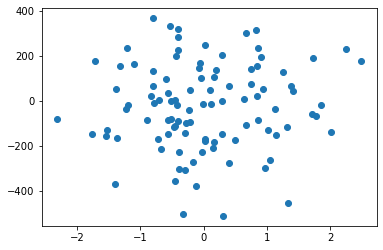

In [6]:
plt.scatter(X[:, 0], y)

In [7]:
from pandas.plotting import scatter_matrix

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(X)
df['y'] = y

In [12]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation with $y$')

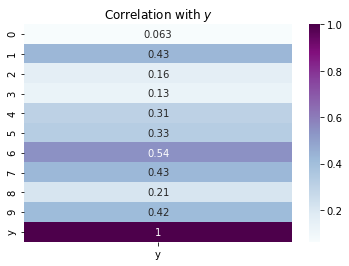

In [18]:
sns.heatmap(df.corr()[['y']], annot = True, cmap = 'BuPu')
plt.title('Correlation with $y$')

### The Normal Equation

The normal equation aka Linear Regression looks like:

$$\beta = (X^TX)^{-1}X^Ty$$

In [19]:
%%latex
$$\beta = (X^TX)^{-1}X^Ty$$

<IPython.core.display.Latex object>

In [20]:
def ols(X, y):
    return np.linalg.inv(X.T@X)@X.T@y

In [23]:
b = ols(X, y)

In [24]:
X[0, :]@b

-60.37281495047168

In [26]:
def prod(X):
    return X@b

In [29]:
preds = np.apply_along_axis(prod, 1, X)

In [35]:
preds[:5]

array([-60.37281495, 192.45314443,  -8.10132131, -83.61340882,
        -0.93527585])

In [36]:
y[:5]

array([-60.37281495, 192.45314443,  -8.10132131, -83.61340882,
        -0.93527585])

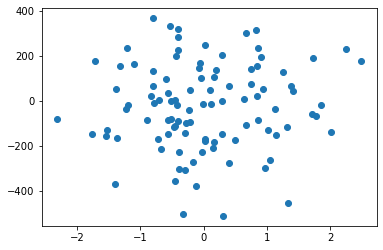

In [33]:
plt.scatter(X[:, 0], y)

In [51]:
class Dog:
    def __init__(self, name):
        self.name = name
    
    def bark(self):
        return 'woof'
    
    def obey(self):
        return f'{self.name} obeys'

In [52]:
doggie_1 = Dog('steve')

In [53]:
doggie_1.name

'steve'

In [54]:
doggie_1.bark()

'woof'

In [55]:
doggie_1.obey()

'steve obeys'

In [90]:
class LinearRegression:
    
    def __init__(self, fit_intercept = False):
        self.coefs_ = None
        self.intercept_ = None
        self.fit_intercept = fit_intercept
        
    def fit(self, X, y):
        if self.fit_intercept:
            ones = np.ones((X.shape[0], 1))
            X = np.concatenate((ones, X), axis = 1)
        weights = np.linalg.inv(X.T@X)@X.T@y
        self.coefs_ = weights[1:]
        self.intercept_ = weights[0]
        return self
    
    def predict(self, X):
        return X@self.coefs_.T + self.intercept_

In [91]:
lr = LinearRegression(fit_intercept=True)

In [92]:
lr.fit(X, y)

In [93]:
lr.predict(X)

array([ -60.37281495,  192.45314443,   -8.10132131,  -83.61340882,
         -0.93527585, -297.27544753,  197.97044792,  176.29825328,
        -98.36788118,  -16.22368171,   19.90012034,   53.18678817,
        106.19461959,   20.35570224, -183.42138533, -453.03126413,
        317.92208329, -137.46660104,   97.21644433,  -18.43089939,
        127.44156828,  -67.90682695, -132.04458635,  -15.58055657,
       -115.58350926,  233.98220982, -208.95516861, -262.46805895,
        202.6541721 ,  -18.38645619, -112.6073131 , -166.60075971,
         36.02892538, -130.48589543, -115.60078466, -145.92629691,
        367.07622889,  190.07440382,  -35.16580096,   75.21191848,
        142.54272556,  -37.53586782,  134.84056808,  152.42132309,
         44.05899604,  227.33630015,  145.71670489,  247.00850702,
       -147.34811716, -227.67969237,  168.06066506, -142.20866156,
       -154.82950633, -274.47716792,   52.12334218,  331.44226996,
       -512.42640885,  -81.92721449, -503.41757849,  -94.94174

In [94]:
lr.coefs_.shape

(10,)

In [95]:
lr.intercept_

-7.105427357601002e-15

In [96]:
lr.predict(X)

array([ -60.37281495,  192.45314443,   -8.10132131,  -83.61340882,
         -0.93527585, -297.27544753,  197.97044792,  176.29825328,
        -98.36788118,  -16.22368171,   19.90012034,   53.18678817,
        106.19461959,   20.35570224, -183.42138533, -453.03126413,
        317.92208329, -137.46660104,   97.21644433,  -18.43089939,
        127.44156828,  -67.90682695, -132.04458635,  -15.58055657,
       -115.58350926,  233.98220982, -208.95516861, -262.46805895,
        202.6541721 ,  -18.38645619, -112.6073131 , -166.60075971,
         36.02892538, -130.48589543, -115.60078466, -145.92629691,
        367.07622889,  190.07440382,  -35.16580096,   75.21191848,
        142.54272556,  -37.53586782,  134.84056808,  152.42132309,
         44.05899604,  227.33630015,  145.71670489,  247.00850702,
       -147.34811716, -227.67969237,  168.06066506, -142.20866156,
       -154.82950633, -274.47716792,   52.12334218,  331.44226996,
       -512.42640885,  -81.92721449, -503.41757849,  -94.94174